In [ ]:
import os
import datetime
import math
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import ewtpy
import joblib

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

In [29]:
# DATA
df1 = pd.read_csv('data/data_day.csv')
df2 = pd.read_csv('data/data_2018-08-05_2021-04-30.csv')
df3 = pd.read_csv('data/data_2018-05-05_2018-08-04.csv')
df4 = pd.read_csv('data/data_2015-08-09_2018-05-04.csv')
df5 = pd.read_csv('data/data_2013-02-12_2015-08-08.csv')
df6 = pd.read_csv('data/data_2010-05-19_to_2013-02-11.csv')
df7 = pd.read_csv('data/data_2007-08-23_to_2010-05-18.csv')
df8 = pd.read_csv('data/data_2004-11-26_to_2007-08-22.csv')
# df_test = pd.read_csv('Hanoi 2024-01-22 to 2024-05-01.csv')
df = pd.concat([df6, df5, df4, df3, df2, df1])
df.index = range(0,len(df))
df.tail()
date_time = pd.concat([pd.to_datetime(df['datetime'][0:4000]),pd.to_datetime(df['datetime'][4000:])])
data_use = df[['temp','tempmax', 'tempmin','humidity', 'precip', 'windspeed', 'solarradiation', 'solarenergy']]

print(data_use)

      temp  tempmax  tempmin  humidity  precip  windspeed  solarradiation  \
0     30.8     36.5     26.0      78.1   0.000       20.5           301.4   
1     31.3     36.4     27.0      76.0   0.300       24.1           281.5   
2     30.7     39.0     26.0      76.1   2.300       40.7           237.1   
3     31.5     39.6     26.0      71.2   0.800       15.1           296.8   
4     27.6     30.8     25.8      80.1  33.000       22.7           240.8   
...    ...      ...      ...       ...     ...        ...             ...   
4991  20.5     22.0     19.5      93.8   8.794       17.5           148.7   
4992  22.4     26.5     20.0      84.5   0.683       19.4           140.8   
4993  22.6     26.6     20.0      85.5   0.072       20.3           131.9   
4994  23.0     26.0     19.0      82.4   3.300       20.5            63.7   
4995  16.0     18.0     14.0      91.4   3.400       22.3            15.8   

      solarenergy  
0            26.1  
1            24.3  
2            20

In [30]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s[1] - timestamp_s[0]

86400.0

C:\Users\tridu\AppData\Local\Temp\ipykernel_16796\1206436225.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_use['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
C:\Users\tridu\AppData\Local\Temp\ipykernel_16796\1206436225.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_use['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))


Index(['temp', 'tempmax', 'tempmin', 'humidity', 'precip', 'windspeed',
       'solarradiation', 'solarenergy', 'Year sin', 'Year cos'],
      dtype='object')

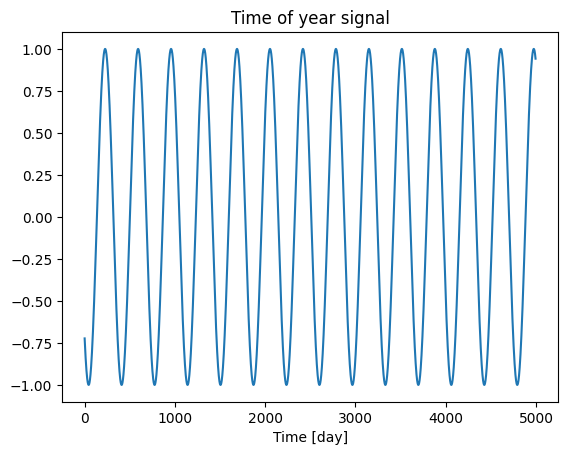

In [31]:
# PERIOD TIME

day = 24*60*60
year = (365.2425)*day
# df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
# df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
data_use['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
data_use['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

# plt.plot(np.array(df['Year sin'])[:366])
plt.plot(np.array(data_use['Year cos'])[:])
plt.xlabel('Time [day]')
plt.title('Time of year signal')
data_use.columns

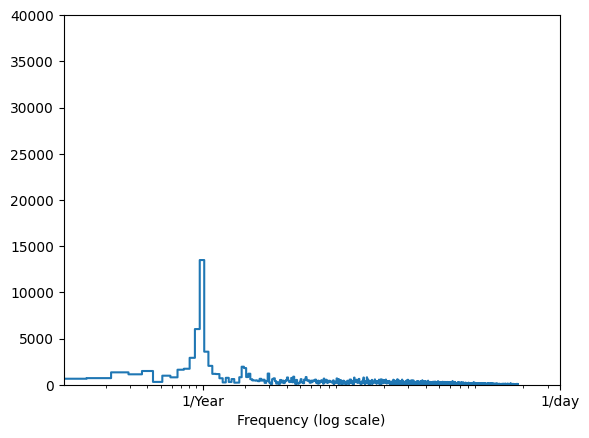

In [32]:
fft = tf.signal.rfft(data_use['temp'])
f_per_dataset = np.arange(0, len(fft))

n_samples_day = len(data_use['humidity'])
days_per_year = 365.2524
years_per_dataset = n_samples_day/(days_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 40000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [33]:
num_mode = 16
def decompose_to_ewt(data):
    temp_data,  mfb ,boundaries = ewtpy.EWT1D(data, N = num_mode)
    return temp_data, mfb, boundaries
def split_mode(ewt):
    modes = []*num_mode
    for i in range(num_mode):
        modes[i] = [m for m in ewt[:,i]]
    return modes

In [34]:
temp_ewt,_,_ = decompose_to_ewt(data_use['temp'])
# for i in range(num_mode):
#     plt.plot(temp_ewt[:,i])
#     plt.show()
# print(temp_ewt.shape) 

C:\Users\tridu\AppData\Local\Temp\ipykernel_16796\3937142139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_use['temp_ewt'+str(i)] = temp_ewt_transpose[i]
C:\Users\tridu\AppData\Local\Temp\ipykernel_16796\3937142139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_use['temp_ewt'+str(i)] = temp_ewt_transpose[i]
C:\Users\tridu\AppData\Local\Temp\ipykernel_16796\3937142139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

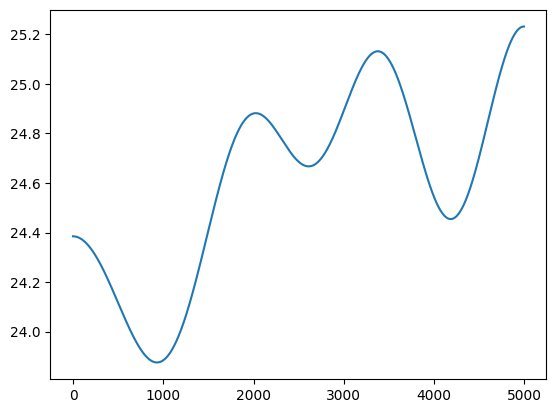

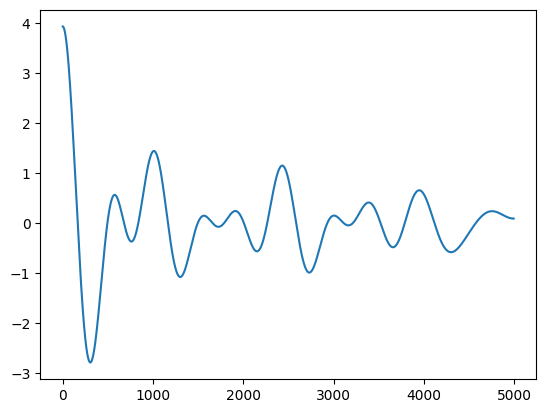

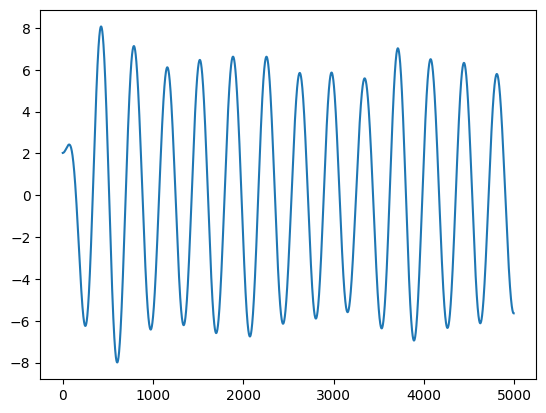

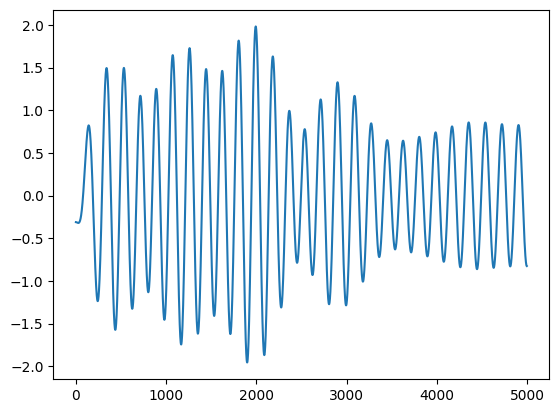

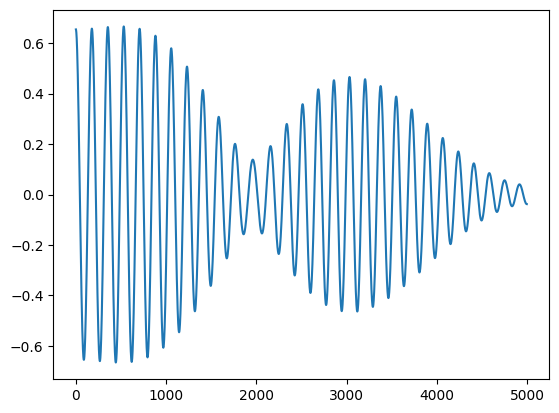

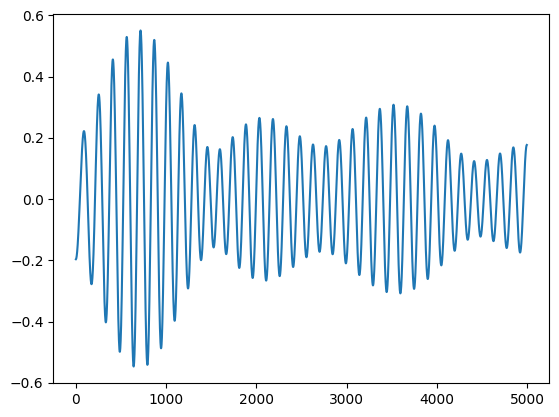

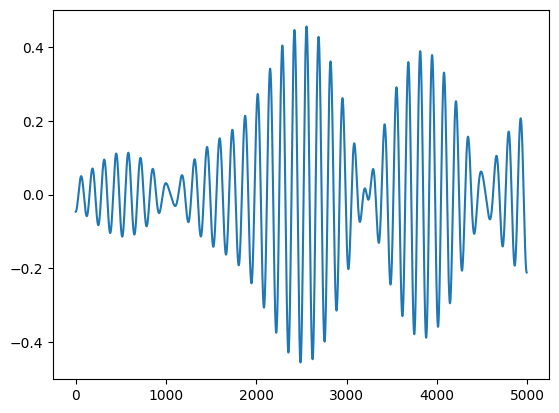

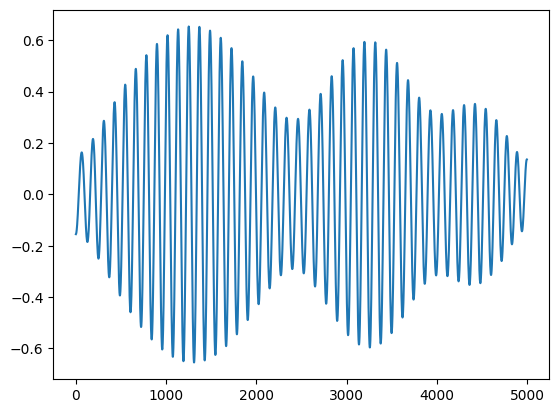

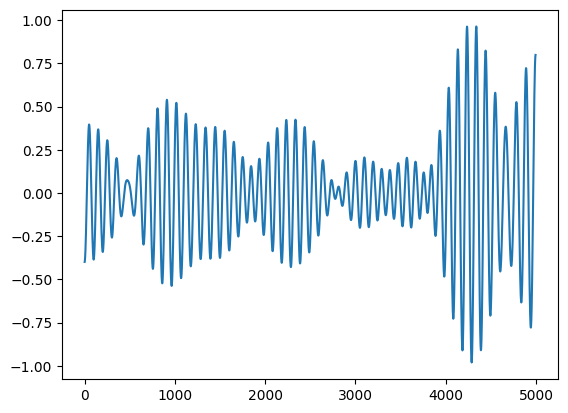

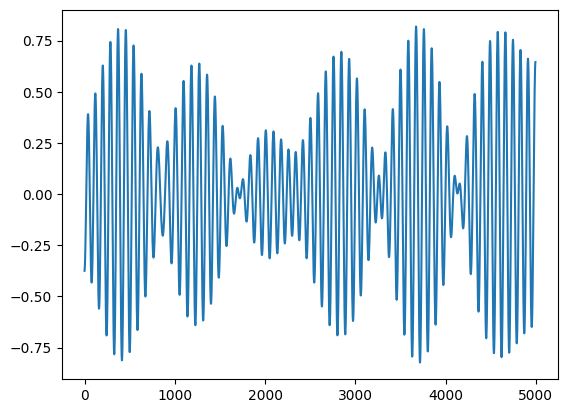

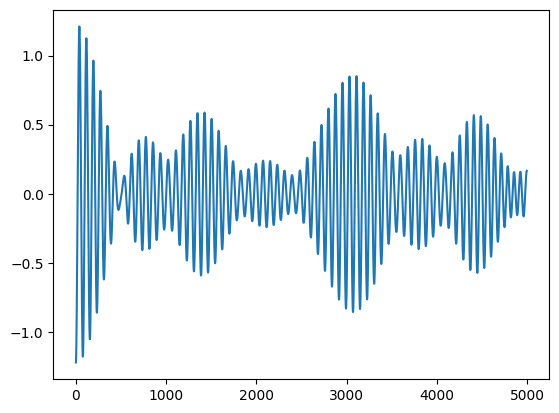

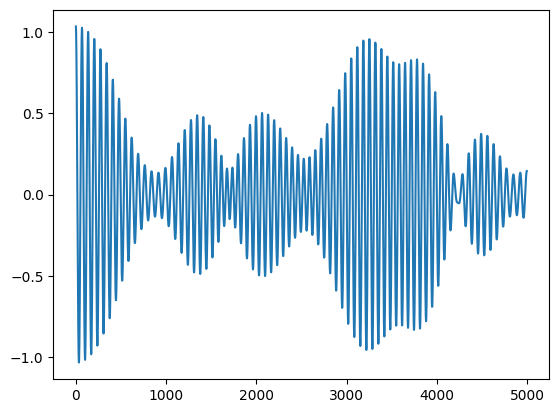

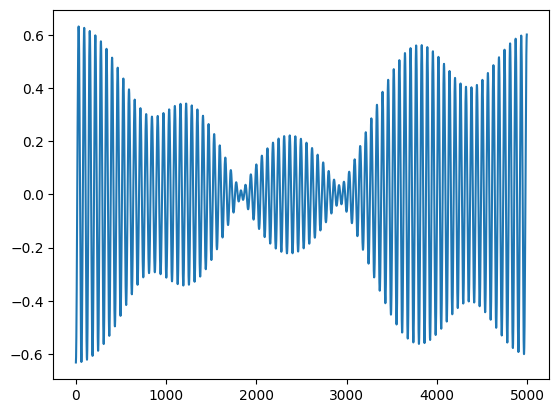

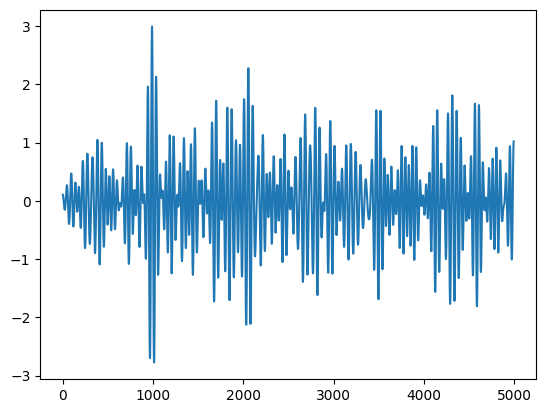

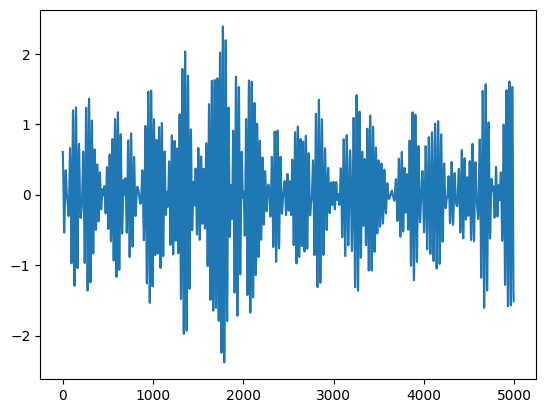

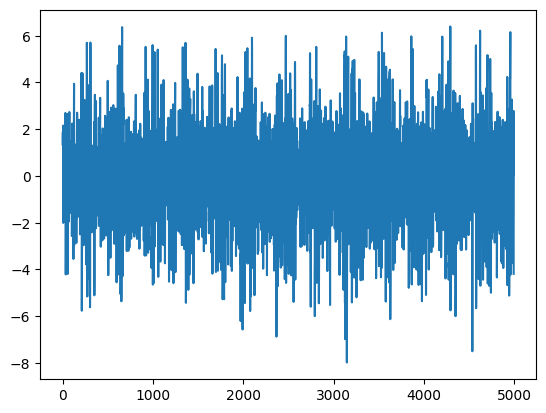

In [35]:
temp_ewt_transpose = np.transpose(temp_ewt)
for i in range(num_mode):
    data_use['temp_ewt'+str(i)] = temp_ewt_transpose[i]
for i in range(num_mode):
    plt.plot(data_use['temp_ewt'+str(i)])
    plt.show()

In [36]:
data_use.columns

Index(['temp', 'tempmax', 'tempmin', 'humidity', 'precip', 'windspeed',
       'solarradiation', 'solarenergy', 'Year sin', 'Year cos', 'temp_ewt0',
       'temp_ewt1', 'temp_ewt2', 'temp_ewt3', 'temp_ewt4', 'temp_ewt5',
       'temp_ewt6', 'temp_ewt7', 'temp_ewt8', 'temp_ewt9', 'temp_ewt10',
       'temp_ewt11', 'temp_ewt12', 'temp_ewt13', 'temp_ewt14', 'temp_ewt15'],
      dtype='object')

In [37]:
print(data_use[:5])

   temp  tempmax  tempmin  humidity  precip  windspeed  solarradiation  \
0  30.8     36.5     26.0      78.1     0.0       20.5           301.4   
1  31.3     36.4     27.0      76.0     0.3       24.1           281.5   
2  30.7     39.0     26.0      76.1     2.3       40.7           237.1   
3  31.5     39.6     26.0      71.2     0.8       15.1           296.8   
4  27.6     30.8     25.8      80.1    33.0       22.7           240.8   

   solarenergy  Year sin  Year cos  ...  temp_ewt6  temp_ewt7  temp_ewt8  \
0         26.1  0.690694 -0.723147  ...  -0.046466  -0.154915  -0.398982   
1         24.3  0.678152 -0.734921  ...  -0.046338  -0.154551  -0.397417   
2         20.5  0.665410 -0.746478  ...  -0.046082  -0.153823  -0.394292   
3         25.7  0.652471 -0.757814  ...  -0.045699  -0.152733  -0.389621   
4         20.6  0.639338 -0.768926  ...  -0.045189  -0.151284  -0.383422   

   temp_ewt9  temp_ewt10  temp_ewt11  temp_ewt12  temp_ewt13  temp_ewt14  \
0  -0.374947   -1.2208

In [ ]:
# number_train = int(data_use.shape[0] * 0.8)
# train, test = data_use[0:number_train], data_use[number_train:]

In [38]:
def create_data(in_steps, out_steps, data, features):
    X = []
    y = []
    for i in range(len(data)-in_steps-out_steps + 1):
        X.append(data[i:i+in_steps])
        y.append(data[i+in_steps:i+in_steps+out_steps][features])
    return np.array(X), np.array(y)
def normalize(data, train_mean, train_std):
    data_norm = (data - train_mean)/train_std
    return data_norm
def unnormalize(data, train_mean, train_std):
    data_unnorm = (data * train_std) + train_mean
    return data_unnorm


In [39]:
number_train = int(data_use.shape[0] * 0.8)
train, test = data_use[0:number_train], data_use[number_train:]

In [40]:
in_steps = 365
out_steps = 7
features_train = ['temp']
num_features = len(features_train) 

In [41]:
X_train, y_train = create_data(in_steps, out_steps, train, features_train)
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1], num_features)

X_test, y_test = create_data(in_steps, out_steps, test, features_train)
y_test = y_test.reshape(y_test.shape[0], y_test.shape[1], num_features)

X_train_norm = normalize(X_train, X_train.mean(), X_train.std())
y_train_norm = normalize(y_train, y_train.mean(), y_train.std())

X_test_norm = normalize(X_test, X_train.mean(), X_train.std())
y_test_norm = normalize(y_test, y_train.mean(), y_train.std())

print(X_train_norm.shape, y_train_norm.shape, X_test_norm.shape, y_test_norm.shape)

(3625, 365, 26) (3625, 7, 1) (629, 365, 26) (629, 7, 1)


In [28]:
print(X_train_norm.shape)

(3625, 365, 26)


In [43]:
print(X_train_norm[:5])

[[[ 0.38921976  0.5332552   0.26792676 ... -0.38642113 -0.37377365
   -0.35498307]
  [ 0.40185445  0.53072826  0.29319614 ... -0.38647896 -0.37431358
   -0.34188508]
  [ 0.38669282  0.59642863  0.26792676 ... -0.38659368 -0.37537256
   -0.35615541]
  ...
  [ 0.21486107  0.26792676  0.16684926 ... -0.40872021 -0.39349087
   -0.44605636]
  [ 0.24013045  0.36900426  0.14157989 ... -0.40719826 -0.39611826
   -0.41866259]
  [ 0.27550757  0.39932751  0.16684926 ... -0.40539636 -0.39833861
   -0.38339873]]

 [[ 0.40185445  0.53072826  0.29319614 ... -0.38647896 -0.37431358
   -0.34188508]
  [ 0.38669282  0.59642863  0.26792676 ... -0.38659368 -0.37537256
   -0.35615541]
  [ 0.40690832  0.61159026  0.26792676 ... -0.38676342 -0.37690972
   -0.33464048]
  ...
  [ 0.24013045  0.36900426  0.14157989 ... -0.40719826 -0.39611826
   -0.41866259]
  [ 0.27550757  0.39932751  0.16684926 ... -0.40539636 -0.39833861
   -0.38339873]
  [ 0.2704537   0.35636957  0.19211864 ... -0.40333479 -0.40006032
   -0.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(out_steps*num_features),
    tf.keras.layers.Reshape([out_steps, num_features])
])



In [ ]:
# Định nghĩa lớp SliceLayer
class SliceLayer(tf.keras.layers.Layer):
    def __init__(self, start, stop, **kwargs):
        super(SliceLayer, self).__init__(**kwargs)
        self.start = start
        self.stop = stop

    def call(self, inputs):
        return inputs[:, self.start:self.stop, :]

    def get_config(self):
        config = super(SliceLayer, self).get_config()
        config.update({'start': self.start, 'stop': self.stop})
        return config

# Sử dụng lớp SliceLayer trong mô hình
CONV_WIDTH = 5

model = tf.keras.Sequential([
    # Sử dụng SliceLayer để cắt tensor
    SliceLayer(start=-CONV_WIDTH, stop=None),
    # Shape => [batch, CONV_WIDTH, features]
    tf.keras.layers.Conv1D(64, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Dense(out_steps*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Reshape([out_steps, num_features])
    # Shape => [batch, out_steps, features]
])

# Đảm bảo thay thế `# số bước đầu ra mong muốn` và `# số đặc trưng` bằng các giá trị thực tế


In [ ]:
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Lion(learning_rate = 0.001),
)

In [ ]:
history = model.fit(X_train_norm, y_train_norm, epochs=5, validation_split=0.2, batch_size=32, validation_batch_size=32)

In [ ]:
model.evaluate(X_test_norm, y_test_norm)


In [ ]:
model_name = "FINAL_LSTM_365_7.keras"


In [ ]:
model.save(f"model_final/{model_name}")

In [ ]:
model_recall_CNN = tf.keras.models.load_model(f"model_final/{model_name}", custom_objects={'SliceLayer': SliceLayer})

In [ ]:
model_recall = tf.keras.models.load_model(f"model_final/{model_name}")

In [ ]:
print(model_recall.evaluate(X_test_norm, y_test_norm))
print(model_recall_CNN.evaluate(X_test_norm, y_test_norm))

In [ ]:
predict = model_recall.predict(X_test_norm)
feature = 0
predict_unnorm = unnormalize(predict, y_train.mean(), y_train.std())
y_test_unnorm = unnormalize(y_test_norm, y_train.mean(), y_train.std())
for i in range(out_steps):
    print('Day: ', i+1)
    print('MAE: ', mean_absolute_error(y_test_unnorm[:,i,feature], predict_unnorm[:,i,feature]))
    print('MSE: ', mean_squared_error(y_test_unnorm[:,i,feature], predict_unnorm[:,i,feature]))
    print('CORR: ', np.corrcoef(y_test_unnorm[:,i,feature], predict_unnorm[:,i,feature])[0,1])
for i in range(out_steps):
    plt.title('Day: ' + str(i+1))
    plt.plot(y_test_unnorm[:,i,feature])
    plt.plot(predict_unnorm[:,i,feature])
    plt.legend(['True', 'Predict'])
    plt.show()
for i in range(0, 200, out_steps):
    plt.title('Time: ' + str(i+1))
    plt.plot(y_test_unnorm[i,:,feature])
    plt.plot(predict_unnorm[i,:,feature])
    plt.show()
    

In [ ]:
model_60_recall = tf.keras.models.load_model('lstm60-ewt-7-temp-not_overfit.keras')
model_90_recall = tf.keras.models.load_model('lstm90-ewt-7-temp-not_overfit.keras')
model_180_recall = tf.keras.models.load_model('lstm180-ewt-7-temp-not_overfit.keras')
model_365_recall = tf.keras.models.load_model('lstm365-ewt-7-temp-not_overfit.keras')
model_730_recall = tf.keras.models.load_model('lstm730-ewt-7-temp-not_overfit.keras')

In [ ]:
print(model_60_recall.evaluate(X_test_norm, y_test_norm))
print(model_90_recall.evaluate(X_test_norm, y_test_norm))
print(model_180_recall.evaluate(X_test_norm, y_test_norm))
print(model_365_recall.evaluate(X_test_norm, y_test_norm))
print(model_730_recall.evaluate(X_test_norm, y_test_norm))

In [ ]:
predict_60 = model_60_recall.predict(X_test_norm)
predict_90 = model_90_recall.predict(X_test_norm)
predict_180 = model_180_recall.predict(X_test_norm)
predict_365 = model_365_recall.predict(X_test_norm)
predict_730 = model_730_recall.predict(X_test_norm)

unnormalize_60 = unnormalize(predict_60, y_train.mean(), y_train.std())
unnormalize_90 = unnormalize(predict_90, y_train.mean(), y_train.std())
unnormalize_180 = unnormalize(predict_180, y_train.mean(), y_train.std())
unnormalize_365 = unnormalize(predict_365, y_train.mean(), y_train.std())
unnormalize_730 = unnormalize(predict_730, y_train.mean(), y_train.std())

In [ ]:

data_views = []
for i in range(7):
    data_views.append([y_test_unnorm[:,i,0], unnormalize_60[:,i,0], unnormalize_90[:,i,0], unnormalize_180[:,i,0], unnormalize_365[:,i,0], unnormalize_730[:,i,0]])

# data_view_1 = [y_test_unnorm[:,0,0], unnormalize_60[:,0,0], unnormalize_90[:,0,0], unnormalize_180[:,0,0], unnormalize_365[:,0,0], unnormalize_730[:,0,0]]
# data_view_2 = [y_test_unnorm[:,1,0], unnormalize_60[:,1,0], unnormalize_90[:,1,0], unnormalize_180[:,1,0], unnormalize_365[:,1,0], unnormalize_730[:,1,0]]
# data_view_3 = [y_test_unnorm[:,2,0], unnormalize_60[:,2,0], unnormalize_90[:,2,0], unnormalize_180[:,2,0], unnormalize_365[:,2,0], unnormalize_730[:,2,0]]
# data_view_4 = [y_test_unnorm[:,3,0], unnormalize_60[:,3,0], unnormalize_90[:,3,0], unnormalize_180[:,3,0], unnormalize_365[:,3,0], unnormalize_730[:,3,0]]
# data_view_5 = [y_test_unnorm[:,4,0], unnormalize_60[:,4,0], unnormalize_90[:,4,0], unnormalize_180[:,4,0], unnormalize_365[:,4,0], unnormalize_730[:,4,0]]
# data_view_6 = [y_test_unnorm[:,5,0], unnormalize_60[:,5,0], unnormalize_90[:,5,0], unnormalize_180[:,5,0], unnormalize_365[:,5,0], unnormalize_730[:,5,0]]
# data_view_7 = [y_test_unnorm[:,6,0], unnormalize_60[:,6,0], unnormalize_90[:,6,0], unnormalize_180[:,6,0], unnormalize_365[:,6,0], unnormalize_730[:,6,0]]
pd_data_views = pd.DataFrame(data_views)


In [ ]:
labels = ['True', '60', '90', '180', '365', '730']

fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(nrows=7, ncols=1, figsize=(6, 21))
bplot1 = ax1.boxplot(data_views[0],
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Day 1')
bplot2 = ax2.boxplot(data_views[1],
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Day 2')
bplot3 = ax3.boxplot(data_views[2],
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax3.set_title('Day 3')
bplot4 = ax4.boxplot(data_views[3],
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax4.set_title('Day 4')
bplot5 = ax5.boxplot(data_views[4],
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax5.set_title('Day 5')
bplot6 = ax6.boxplot(data_views[5],
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax6.set_title('Day 6')
bplot7 = ax7.boxplot(data_views[6],
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax7.set_title('Day 7')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'lightyellow', 'lightcoral', 'lightgrey']
for bplot in (bplot1, bplot2, bplot3, bplot4, bplot5, bplot6,bplot7):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2, ax3, ax4, ax5, ax6,ax7]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Lag')
    ax.set_ylabel('Observed values')

plt.show()

In [ ]:
model_recall_RF = joblib.load('model_rf-ewt-90-7.pkl')

In [ ]:
predictions = model_recall_RF.predict(X_test_norm.reshape(X_test_norm.shape[0], X_test_norm.shape[1]*X_test_norm.shape[2]))
predictions = predictions.reshape(predictions.shape[0], out_steps, num_features)

predict_unnorm = unnormalize(predictions, y_train.mean(), y_train.std())

In [ ]:
data_view_rf = [y_test_unnorm[:,0,0], predict_unnorm[:,0,0], data_views[1][1], data_views[2][1], data_views[3][1], data_views[4][1], data_views[5][1], data_views[6][1]]
plt.boxplot(data_view_rf)

In [ ]:
X_test_norm = X_double_test_norm
y_test_norm = y_double_test_norm
predict = model_recall.predict(X_test_norm)
feature = 0
predict_unnorm = unnormalize(predict, y_train.mean(), y_train.std())
y_test_unnorm = unnormalize(y_test_norm, y_train.mean(), y_train.std())
for i in range(out_steps):
    print('Day: ', i+1)
    print('MAE: ', mean_absolute_error(y_test_unnorm[:,i,feature], predict_unnorm[:,i,feature]))
    print('MSE: ', mean_squared_error(y_test_unnorm[:,i,feature], predict_unnorm[:,i,feature]))
    print('CORR: ', np.corrcoef(y_test_unnorm[:,i,feature], predict_unnorm[:,i,feature])[0,1])
for i in range(out_steps):
    plt.title('Day: ' + str(i+1))
    plt.plot(y_test_unnorm[:,i,feature])
    plt.plot(predict_unnorm[:,i,feature])
    plt.legend(['True', 'Predict'])
    plt.show()
for i in range(0, 200, out_steps):
    plt.title('Time: ' + str(i+1))
    plt.plot(y_test_unnorm[i,:,feature])
    plt.plot(predict_unnorm[i,:,feature])
    plt.show()

In [ ]:
predict = model.predict(X_test_norm)
predict_unnorm = unnormalize(predict, y_train.mean(), y_train.std())
y_test_unnorm = unnormalize(y_test_norm, y_train.mean(), y_train.std())
for i in range(14):
    print('Day: ', i+1)
    print('MAE: ', mean_absolute_error(y_test_unnorm[:,i,0], predict_unnorm[:,i,0]))
    print('MSE: ', mean_squared_error(y_test_unnorm[:,i,0], predict_unnorm[:,i,0]))
    print('CORR: ', np.corrcoef(y_test_unnorm[:,i,0], predict_unnorm[:,i,0])[0,1])
for i in range(14):
    plt.title('Day: ' + str(i+1))
    plt.plot(y_test_unnorm[:,i,0])
    plt.plot(predict_unnorm[:,i,0])
    plt.legend(['True', 'Predict'])
    plt.show()
for i in range(0, 200, 14):
    plt.title('Time: ' + str(i+1))
    plt.plot(y_test_unnorm[i,:,0])
    plt.plot(predict_unnorm[i,:,0])
    plt.show()